In [1]:
import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/Users/wataru/Google_R'

In [3]:
train = pd.read_csv("/Users/wataru/Google_R/train-flattened.csv")
test =  pd.read_csv("/Users/wataru/Google_R/test-flattened.csv")
sample_submission =  pd.read_csv("/Users/wataru/Google_R/sample_submission.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 55 columns):
channelGrouping                                      903653 non-null object
date                                                 903653 non-null int64
fullVisitorId                                        903653 non-null object
sessionId                                            903653 non-null object
socialEngagementType                                 903653 non-null object
visitId                                              903653 non-null int64
visitNumber                                          903653 non-null int64
visitStartTime                                       903653 non-null int64
device.browser                                       903653 non-null object
device.browserSize                                   903653 non-null object
device.browserVersion                                903653 non-null object
device.deviceCategory                                9036

In [6]:
gdf = train.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()
gdf.head()

,fullVisitorId,totals.transactionRevenue
0,4823595352351,0.0
1,5103959234087,0.0
2,10278554503158,0.0
3,20424342248747,0.0
4,26722803385797,0.0


In [7]:
gdf.info()
#ユニークなIDのnが723803、その合計のdf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723803 entries, 0 to 723802
Data columns (total 2 columns):
fullVisitorId                723803 non-null object
totals.transactionRevenue    723803 non-null float64
dtypes: float64(1), object(1)
memory usage: 11.0+ MB


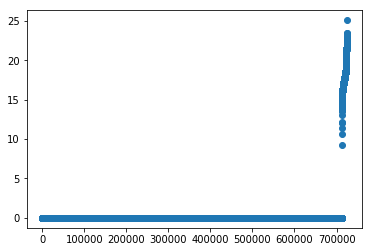

In [8]:
plt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf["totals.transactionRevenue"].values)))#log1p=loge(1+x)

In [9]:
train.describe()

,date,visitId,visitNumber,visitStartTime,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.adwordsClickInfo.page
count,9.036530e+05,9.036530e+05,903653.000000,9.036530e+05,450630.0,903653.000000,703060.0,903553.000000,1.151500e+04,903653.0,21460.000000
mean,2.016589e+07,1.485007e+09,2.264897,1.485007e+09,1.0,4.596538,1.0,3.849764,1.337448e+08,1.0,1.008108
std,4.697698e+03,9.022124e+06,9.283735,9.022124e+06,0.0,9.641437,0.0,7.025274,4.482852e+08,0.0,0.173584
min,2.016080e+07,1.470035e+09,1.000000,1.470035e+09,1.0,1.000000,1.0,1.000000,1.000000e+04,1.0,1.000000
25%,2.016103e+07,1.477561e+09,1.000000,1.477561e+09,1.0,1.000000,1.0,1.000000,2.493000e+07,1.0,1.000000
50%,2.017011e+07,1.483949e+09,1.000000,1.483949e+09,1.0,2.000000,1.0,1.000000,4.945000e+07,1.0,1.000000
75%,2.017042e+07,1.492759e+09,1.000000,1.492759e+09,1.0,4.000000,1.0,4.000000,1.076550e+08,1.0,1.000000
max,2.017080e+07,1.501657e+09,395.000000,1.501657e+09,1.0,500.000000,1.0,469.000000,2.312950e+10,1.0,14.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1100fa780>,
      dtype=object)

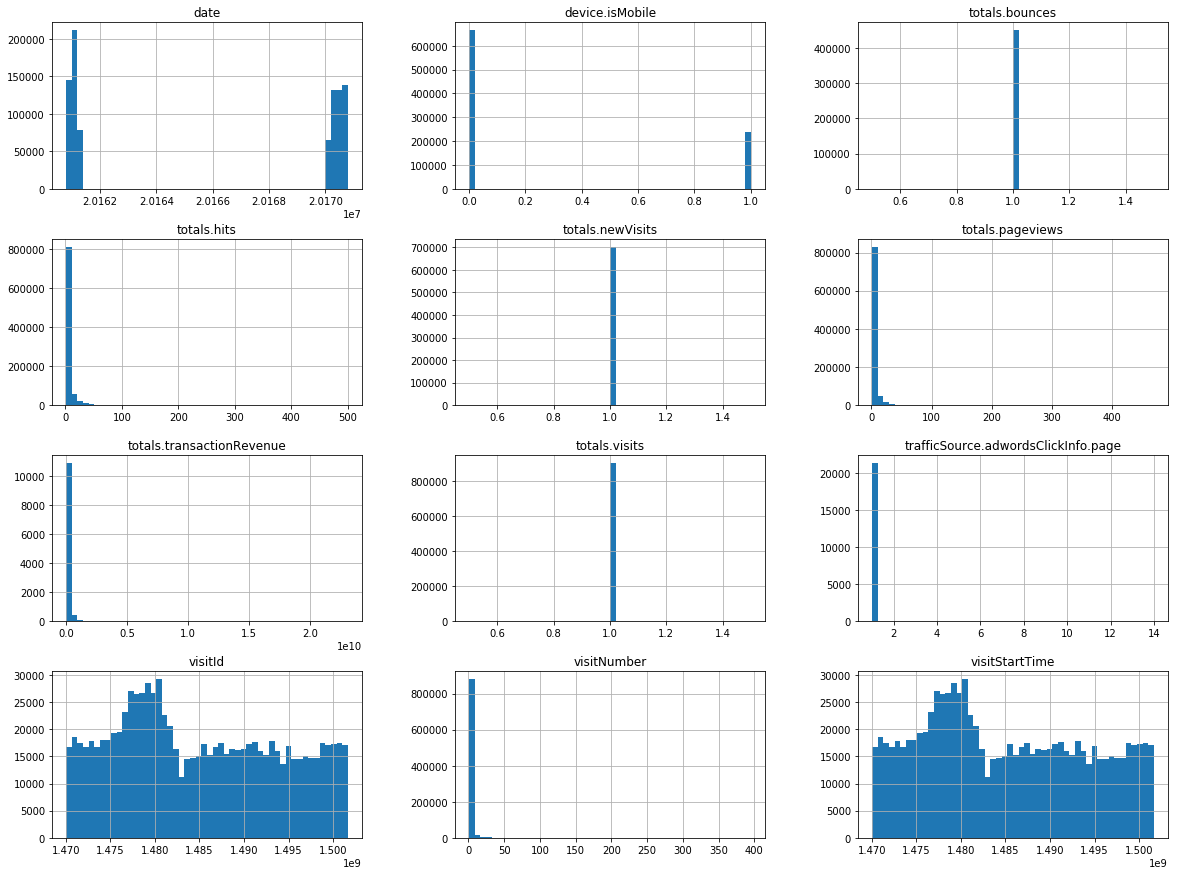

In [10]:
train.hist(bins=50, figsize=(20,15))

In [11]:
train_corr = train.corr()

In [12]:
train_corr["totals.transactionRevenue"].sort_values(ascending=False)

totals.transactionRevenue              1.000000
visitNumber                            0.308895
totals.hits                            0.141973
totals.pageviews                       0.128644
date                                   0.008099
visitId                               -0.003447
visitStartTime                        -0.003447
device.isMobile                       -0.052623
totals.bounces                              NaN
totals.newVisits                            NaN
totals.visits                               NaN
trafficSource.adwordsClickInfo.page         NaN
Name: totals.transactionRevenue, dtype: float64

In [13]:
print (train["channelGrouping"].head())
print (train["channelGrouping"].nunique())
print (train["channelGrouping"].unique().tolist())
#"channelGrouping"は、onehotする

0    Organic Search
1    Organic Search
2    Organic Search
3    Organic Search
4    Organic Search
Name: channelGrouping, dtype: object
8
['Organic Search', 'Referral', 'Paid Search', 'Affiliates', 'Direct', 'Display', 'Social', '(Other)']


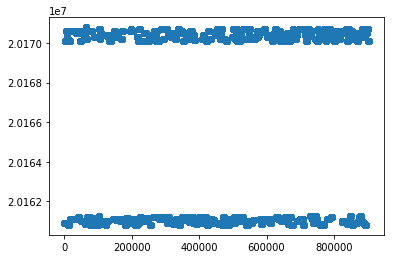

In [14]:
plt.scatter(range(train.shape[0]),train["date"])
#dateに外れ値はなさそう。放置

In [15]:
print (train["fullVisitorId"].head())

0    1131660440785968503
1     377306020877927890
2    3895546263509774583
3    4763447161404445595
4      27294437909732085
Name: fullVisitorId, dtype: object


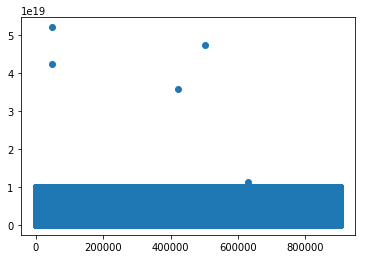

In [16]:
plt.scatter(range(train.shape[0]),train["fullVisitorId"])
#なにやら大きい値がある

In [17]:
train_fullVisitorId_float64 = train[train["fullVisitorId"].astype(np.float64) > 1e19]

In [18]:
train_fullVisitorId_float64
#よくわからん。

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
49165,Direct,20170624,42265292326122750572,42265292326122750572_1498287760,Not Socially Engaged,1498287760,1,1498287760,Safari,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,NaN,(none),NaN,(direct)
49178,Direct,20170624,51983079332407350992,51983079332407350992_1498287765,Not Socially Engaged,1498287765,1,1498287765,Safari,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,NaN,(none),NaN,(direct)
421547,Social,20170109,35846613770150791963,35846613770150791963_1483974247,Not Socially Engaged,1483974247,1,1483974247,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,NaN,referral,/yt/about/ja/,youtube.com
501715,Direct,20170722,47427028546298368646,47427028546298368646_1500708789,Not Socially Engaged,1500708789,1,1500708789,Safari,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,NaN,(none),NaN,(direct)
631126,Direct,20170513,11241321903919452424,11241321903919452424_1494661970,Not Socially Engaged,1494661970,1,1494661970,Safari,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,NaN,(none),NaN,(direct)


In [19]:
print (train["fullVisitorId"].head())

0    1131660440785968503
1     377306020877927890
2    3895546263509774583
3    4763447161404445595
4      27294437909732085
Name: fullVisitorId, dtype: object


In [20]:
print (train["sessionId"].head())
#fullVisitorId_一意の数字で振ってる。重要さはよくわからない。

0    1131660440785968503_1472830385
1     377306020877927890_1472880147
2    3895546263509774583_1472865386
3    4763447161404445595_1472881213
4      27294437909732085_1472822600
Name: sessionId, dtype: object


In [21]:
print (train["socialEngagementType"].head())
print (train["socialEngagementType"].nunique())
print (train["socialEngagementType"].unique().tolist())
#"socialEngagementType"は、意味がないです。

0    Not Socially Engaged
1    Not Socially Engaged
2    Not Socially Engaged
3    Not Socially Engaged
4    Not Socially Engaged
Name: socialEngagementType, dtype: object
1
['Not Socially Engaged']


In [22]:
train["visitId"].head()

0    1472830385
1    1472880147
2    1472865386
3    1472881213
4    1472822600
Name: visitId, dtype: int64

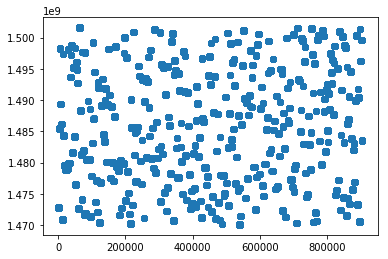

In [23]:
plt.scatter(range(train.shape[0]),train["visitId"])
#数字に意味はないけど、外れ値はない。

In [24]:
print (train["visitNumber"].head())
print (train["visitNumber"].nunique())
print (train["visitNumber"].unique().tolist())
#"socialEngagementType"は、意味がないです。

0    1
1    1
2    1
3    1
4    2
Name: visitNumber, dtype: int64
384
[1, 2, 3, 5, 11, 4, 57, 6, 56, 7, 20, 8, 15, 9, 25, 24, 14, 89, 136, 13, 85, 10, 105, 22, 21, 48, 18, 26, 17, 83, 38, 84, 27, 42, 100, 31, 16, 30, 59, 50, 19, 51, 29, 160, 52, 12, 63, 23, 47, 49, 28, 34, 178, 88, 33, 317, 93, 140, 35, 41, 91, 92, 74, 309, 43, 61, 46, 45, 32, 108, 86, 195, 36, 236, 72, 162, 235, 90, 76, 77, 94, 96, 73, 78, 97, 87, 304, 106, 107, 389, 68, 98, 132, 58, 266, 267, 221, 39, 121, 143, 142, 174, 175, 189, 191, 55, 190, 104, 245, 204, 37, 82, 137, 206, 101, 62, 110, 156, 158, 157, 159, 138, 109, 194, 193, 147, 254, 71, 53, 144, 145, 146, 80, 253, 99, 134, 135, 102, 44, 130, 95, 75, 103, 315, 70, 69, 117, 163, 154, 153, 283, 65, 262, 263, 295, 297, 298, 219, 64, 296, 155, 141, 169, 170, 60, 207, 54, 187, 133, 118, 264, 67, 66, 126, 40, 122, 325, 326, 197, 167, 196, 188, 279, 185, 230, 161, 186, 278, 139, 234, 233, 168, 115, 114, 119, 150, 149, 148, 79, 306, 123, 131, 171, 124, 129, 258, 112, 

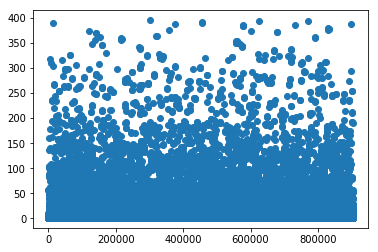

In [25]:
plt.scatter(range(train.shape[0]),train["visitNumber"])
#外れ値はなさそう。int64だしこのままで良さそう。

In [26]:
train["visitStartTime"].head()

0    1472830385
1    1472880147
2    1472865386
3    1472881213
4    1472822600
Name: visitStartTime, dtype: int64

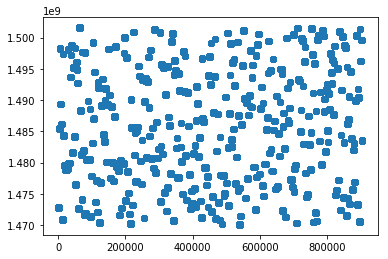

In [27]:
plt.scatter(range(train.shape[0]),train["visitStartTime"])
#とりあえずこのままで。とはいえ何か法則見つけられれば良い特徴量になりそう。

In [28]:
a = train[train["visitNumber"] > 386]
a["totals.transactionRevenue"]

15030    NaN
301285   NaN
377282   NaN
455084   NaN
455231   NaN
625963   NaN
772027   NaN
897443   NaN
Name: totals.transactionRevenue, dtype: float64